In [52]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

import seaborn as sns
sns.set_context('talk')

def get_periodicity(fname):
    df = pd.read_pickle(fname)
    x = df.position_x
    t = (df.position_update_timestamp - df.position_update_timestamp.min())/pd.Timedelta('1s')
    print 'Duration in seconds: ', t.max()
    
    # We sample at 1 hz best, so we can't measure any components above 0.5 hz
    # We can in principle see very low frequency all the way down to dc
    # but we can't tell the difference between dc and an 8h frequency
    
    # If we chunk down to 30m or 1h, 1e-4 is a better lower bound
    f = np.logspace(-5, np.log10(0.5), 10000)# in hertz
    return f, signal.lombscargle(t.values, x.values.astype(float), f)


def frequency_plot(fname):
    df = pd.read_pickle(fname)
    x = df.position_x
    t = (df.position_update_timestamp - df.position_update_timestamp.min())/pd.Timedelta('1s')
    
    # We sample at 1 hz best, so we can't measure any components above 0.5 hz
    # We can in principle see very low frequency all the way down to dc
    # but a reasonable constraint is a period ~ 8h or f ~ 1e-5
    
    # If we chunk down to 30m or 1h, 1e-4 is a better lower bound
    f, p = get_periodicity(fname)

    fig,(ax1,ax2) = plt.subplots(2,figsize=(12,8))
    ax1.plot(t,x)
    ax1.set_xlabel('Time')
    ax2.plot(f, p/p.max())
    ax2.set_xscale('log')
    ax2.set_xlabel('Period')
    ax2.set_xticks([1./3600, 1./600, 1./60, 1./30, 1./10, 1./3])
    ax2.set_xticklabels(["1h", "10m", "1m", "30s", "10s","3s"])
    
    
def heights(fname, intervals=np.logspace(-4,np.log10(0.5),10)):
    f, p = get_periodicity(fname)
    p/=p.max()
    arm = signal.argrelmax(p)
    fm, pm = f[arm], p[arm]
    sort = np.argsort(pm)[::-1]
    maxes, periods = pm[sort], 1.0/fm[sort]
    print pm[sort][:10]
    print 1.0/fm[sort][:10]
    return pm[sort][:10]
    

Duration in seconds:  75.0
Duration in seconds:  75.0
[ 0.07242651  0.05853649  0.03063098]
[ 3.4842657   5.42398349  2.44590497]


array([ 0.07242651,  0.05853649,  0.03063098])

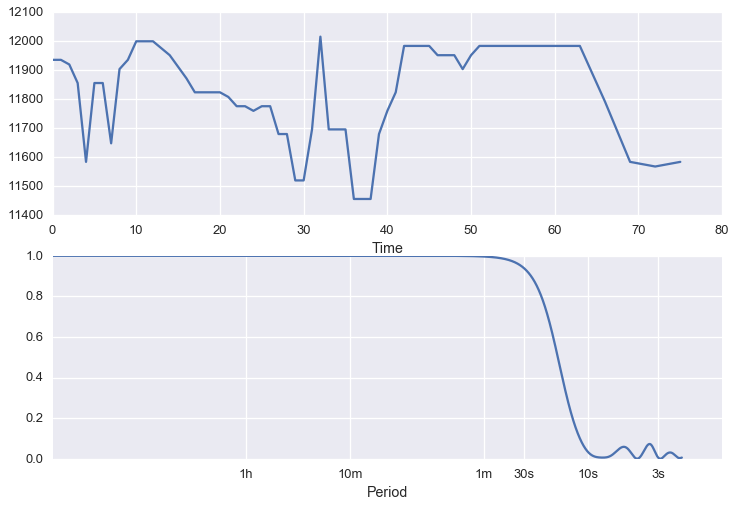

In [53]:
# Short task example
frequency_plot('data/gps_000286.pkl')
heights('data/gps_000286.pkl')

Notice that we get a constant value below about 1m, which makes sense considering the task is only that long.

Duration in seconds:  2660.0
Duration in seconds:  2660.0
[ 0.11722982  0.08911329  0.02577252  0.0237073   0.01439415  0.01271279
  0.00799056  0.00791509  0.00721852  0.00368192]
[ 297.24266046  167.32887013   57.44684891   95.94440749   77.60874171
   40.72152383   29.27460897   37.71012723   24.3030475    20.81894628]


array([ 0.11722982,  0.08911329,  0.02577252,  0.0237073 ,  0.01439415,
        0.01271279,  0.00799056,  0.00791509,  0.00721852,  0.00368192])

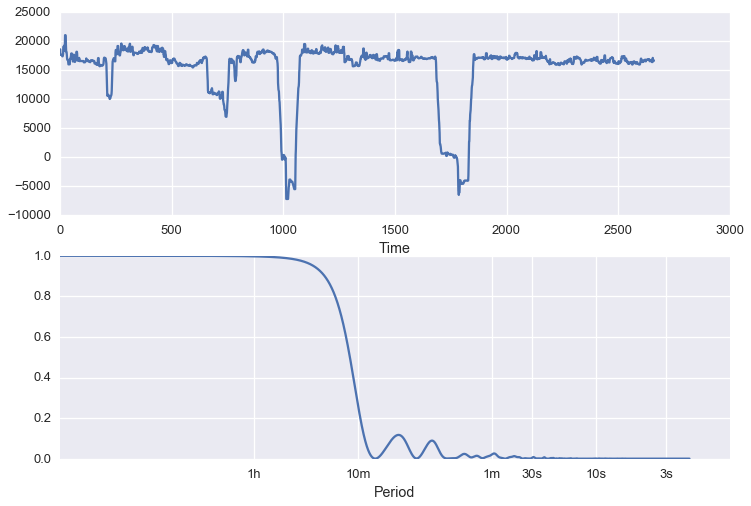

In [54]:
# Medium task example
frequency_plot('data/gps_000250.pkl')
heights('data/gps_000250.pkl')

You can see the periodicity components showing the structure of the ~5 minute deviations.

Duration in seconds:  18172.0
Duration in seconds:  18172.0
[  1.00000000e+00   3.20580667e-02   2.18964231e-02   1.12713674e-02
   7.65315326e-03   5.73636969e-03   5.12229842e-03   4.12368989e-03
   2.24288904e-03   1.10360663e-03   1.04276358e-03   1.02681294e-03
   9.71302939e-04   9.28032276e-04   9.04035004e-04   8.86969025e-04
   8.77772963e-04   6.48516857e-04   6.39155377e-04   6.06728155e-04
   5.73875306e-04   5.22259878e-04   4.80870680e-04   4.65044089e-04
   4.13692907e-04   4.12872982e-04   3.83981881e-04   3.74872420e-04
   3.73888858e-04   3.14798737e-04   3.12901102e-04   3.08935550e-04
   2.97949078e-04   2.87542328e-04   2.82757564e-04   2.82490973e-04
   2.76292668e-04   2.76093980e-04   2.74894806e-04   2.66288186e-04
   2.55056455e-04   2.52510457e-04   2.32940545e-04   2.08325080e-04
   2.05123709e-04   1.99639800e-04   1.96996633e-04   1.94771975e-04
   1.92401246e-04   1.90911332e-04   1.89856031e-04   1.88853107e-04
   1.86549996e-04   1.84403943e-04   1.7289

array([  1.00000000e+00,   3.20580667e-02,   2.18964231e-02,
         1.12713674e-02,   7.65315326e-03,   5.73636969e-03,
         5.12229842e-03,   4.12368989e-03,   2.24288904e-03,
         1.10360663e-03,   1.04276358e-03,   1.02681294e-03,
         9.71302939e-04,   9.28032276e-04,   9.04035004e-04,
         8.86969025e-04,   8.77772963e-04,   6.48516857e-04,
         6.39155377e-04,   6.06728155e-04,   5.73875306e-04,
         5.22259878e-04,   4.80870680e-04,   4.65044089e-04,
         4.13692907e-04,   4.12872982e-04,   3.83981881e-04,
         3.74872420e-04,   3.73888858e-04,   3.14798737e-04,
         3.12901102e-04,   3.08935550e-04,   2.97949078e-04,
         2.87542328e-04,   2.82757564e-04,   2.82490973e-04,
         2.76292668e-04,   2.76093980e-04,   2.74894806e-04,
         2.66288186e-04,   2.55056455e-04,   2.52510457e-04,
         2.32940545e-04,   2.08325080e-04,   2.05123709e-04,
         1.99639800e-04,   1.96996633e-04,   1.94771975e-04,
         1.92401246e-04,

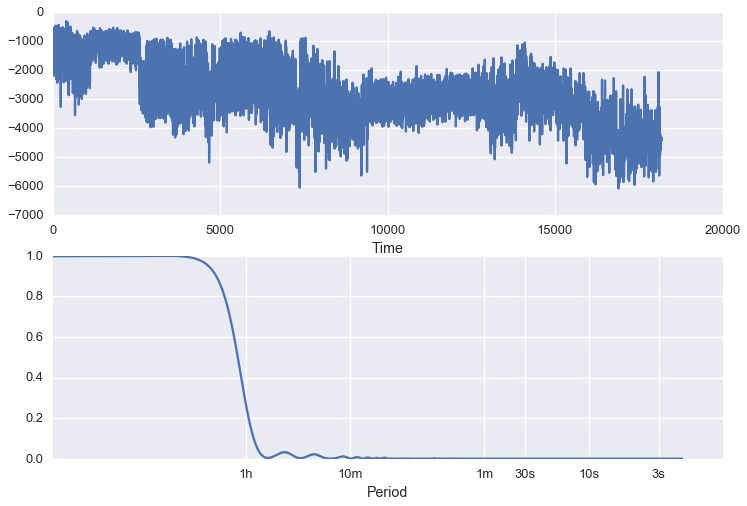

In [47]:
# Long task example
frequency_plot('data/gps_000159.pkl')
heights('data/gps_000159.pkl')

For this long task there is some structure all the way down to the hour timescale.

Duration in seconds:  16534.0
Duration in seconds:  16534.0
[  1.00000000e+00   1.36227703e-01   1.23250963e-01   4.97308661e-02
   3.15405048e-02   1.62650363e-02   1.47433455e-02   1.19263407e-02
   4.52654258e-03   4.43953946e-03   4.36310685e-03   3.82544226e-03
   3.39865583e-03   2.89860721e-03   2.43546439e-03   2.16097519e-03
   2.15801446e-03   2.13510801e-03   2.11508222e-03   2.10083197e-03
   2.04608114e-03   1.94531609e-03   1.77584737e-03   1.70638473e-03
   1.63014487e-03   1.54643679e-03   1.51787636e-03   1.50755670e-03
   1.46147370e-03   1.43602637e-03   1.28902514e-03   1.21467336e-03
   1.20409077e-03   1.16054349e-03   1.14997096e-03   1.12080874e-03
   1.04661828e-03   1.00874785e-03   9.81069387e-04   8.87139240e-04
   8.86506865e-04   8.55535348e-04   8.53977629e-04   8.40470381e-04
   8.08897303e-04   7.99457924e-04   7.65651998e-04   7.40304229e-04
   7.25201110e-04   7.08136934e-04   7.07215929e-04   7.06520880e-04
   6.87991378e-04   6.82245104e-04   6.6151

array([  1.00000000e+00,   1.36227703e-01,   1.23250963e-01,
         4.97308661e-02,   3.15405048e-02,   1.62650363e-02,
         1.47433455e-02,   1.19263407e-02,   4.52654258e-03,
         4.43953946e-03,   4.36310685e-03,   3.82544226e-03,
         3.39865583e-03,   2.89860721e-03,   2.43546439e-03,
         2.16097519e-03,   2.15801446e-03,   2.13510801e-03,
         2.11508222e-03,   2.10083197e-03,   2.04608114e-03,
         1.94531609e-03,   1.77584737e-03,   1.70638473e-03,
         1.63014487e-03,   1.54643679e-03,   1.51787636e-03,
         1.50755670e-03,   1.46147370e-03,   1.43602637e-03,
         1.28902514e-03,   1.21467336e-03,   1.20409077e-03,
         1.16054349e-03,   1.14997096e-03,   1.12080874e-03,
         1.04661828e-03,   1.00874785e-03,   9.81069387e-04,
         8.87139240e-04,   8.86506865e-04,   8.55535348e-04,
         8.53977629e-04,   8.40470381e-04,   8.08897303e-04,
         7.99457924e-04,   7.65651998e-04,   7.40304229e-04,
         7.25201110e-04,

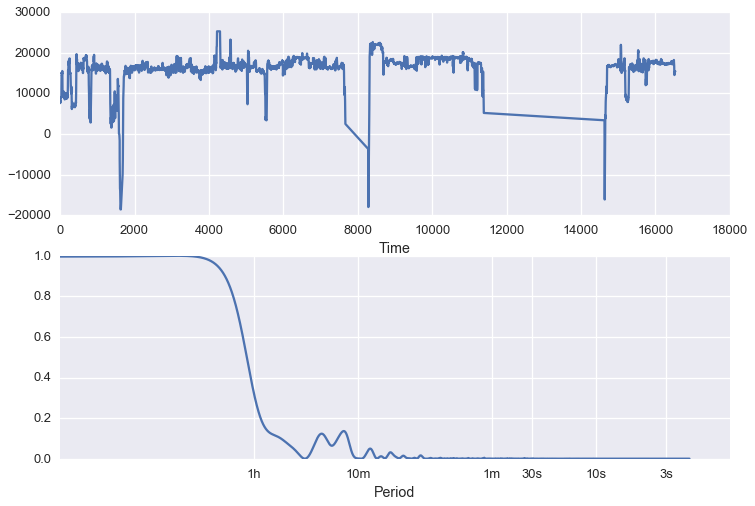

In [48]:
frequency_plot('data/gps_001134.pkl')
heights('data/gps_001134.pkl')